# Job Data
Fueled by big data and AI, demand for data science skills is growing exponentially. Where are these jobs, what are typical job roles , salary range and geographic distribution of these jobs are what we are going to analyse.
In this project, we collected job listing data from simplyhired, indeed, and glassdoor. We searched with the keyword "Data Science" and used python codes to downolad all the necessary information. Once the data is downloaded, we also  will clean the data. 

## 1.Import the required libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from pandas import ExcelWriter
from pandas import ExcelFile
from dateutil.parser import parse 
import re
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
plt.style.use('ggplot')
from collections import Counter
import re
import plotly.figure_factory as ff

## 2.Data Importation

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/sujona/combined_scientist.csv")
state_map = pd.read_csv("https://storage.googleapis.com/prithula/states_data.csv")
state_map.head()

,State,Latitude,Longitude,Abbreviation
0,Alabama,32.806671,-86.791130,AL
1,Alaska,61.370716,-152.404419,AK
2,Arizona,33.729759,-111.431221,AZ
3,Arkansas,34.969704,-92.373123,AR
4,California,36.116203,-119.681564,CA


# 3.Overview of the dataset
 - In this section, we will check how many columns and rows in our dataset are and what their types are and also explore summary statistics of our dataset.
 - In job site datasets, there are 5 columns and 14764 number of rows. This dataset consists of all character variables.

In [ ]:
print(df.shape)
df.info()
df.head()

(14764, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14764 entries, 0 to 14763
Data columns (total 5 columns):
Job_Title           14764 non-null object
Company_Name        14760 non-null object
Location            9434 non-null object
Job_Description     14758 non-null object
Estimated_Salary    6207 non-null object
dtypes: object(5)
memory usage: 576.8+ KB


,Job_Title,Company_Name,Location,Job_Description,Estimated_Salary
0,Data Scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,"Estimated: $110,000 - $140,000 a year"
1,Entry Level Data Scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,"Estimated: $94,000 - $130,000 a year"
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.",Florida +42 locations,EducationBachelor's DegreeSkillsCommunication ...,"Estimated: $91,000 - $130,000 a year"
3,Data Scientist - Entry Level,Numerdox,"Sacramento, CA",SkillsSQL401(k)HadoopAWSSparkBenefitsFlexible ...,"Estimated: $110,000 - $160,000 a year"
4,Data Scientist,Quaxigma,"Schaumburg, IL",EducationMaster's DegreeDoctoral DegreeSkillsS...,"Estimated: $96,000 - $130,000 a year"


# 3.Data wrangling, cleaning, pre-processing


*  Replace spaces in column names with '_'. This will help to access the columns as direct members of the DataFrame 
*  Convert column names to lower case




In [ ]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head()

,job_title,company_name,location,job_description,estimated_salary
0,Data Scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,"Estimated: $110,000 - $140,000 a year"
1,Entry Level Data Scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,"Estimated: $94,000 - $130,000 a year"
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.",Florida +42 locations,EducationBachelor's DegreeSkillsCommunication ...,"Estimated: $91,000 - $130,000 a year"
3,Data Scientist - Entry Level,Numerdox,"Sacramento, CA",SkillsSQL401(k)HadoopAWSSparkBenefitsFlexible ...,"Estimated: $110,000 - $160,000 a year"
4,Data Scientist,Quaxigma,"Schaumburg, IL",EducationMaster's DegreeDoctoral DegreeSkillsS...,"Estimated: $96,000 - $130,000 a year"


- Eliminating Duplicate Job Postings
- By elimaniting duplication, now we have 2675 fields.

In [ ]:
#dropping any duplicate rows:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.shape

(2675, 5)

- It is very common to have missing values in a large dataset which come from missing entry. Missing vale usually is denoted by NAN, i.e. not a number. Missing values can be taken care several ways. Since my dataset is large, I will drop all the missing values in this case. 
- We have plenty of missing values in our dataset.






In [ ]:
df.isnull().values.any()
#df.isnull().sum()
df.isnull().sum().sum()

2555

- Salary column is the key fields in our analysis. So we want to ry column. To prepare the salary data, we first to look at the sorts of values we were dealing with.
- As you can see, there are several aspects of this data that could make further calculations difficult. Python doesn’t know how to handle characters like commas and dollar-signs when conducting mathematical operations, so we need to get rid of these and “\n” strings before we can go much further. On top of this, you’ll notice that salaries can be presented as single figures, or ranges, and that they can appear on different scales of payment — per year, per month, or per hour. We needed to take care of all of these items in the course of preparing our salary data for further analysis. We will begin by stripping out some of the extraneous characters that we know we need to eliminate

In [ ]:
df['estimated_salary'].value_counts()

Estimated: $110,000 - $150,000 a year    171
Estimated: $110,000 - $140,000 a year    146
Estimated: $100,000 - $140,000 a year    117
Estimated: $93,000 - $120,000 a year      54
Estimated: $110,000 - $160,000 a year     53
                                        ... 
$75,000 - $140,000 a year                  1
$90 - $95 an hour                          1
$90,000 - $100,000 a year                  1
$55 - $62 an hour                          1
Estimated: $69,000 - $96,000 a year        1
Name: estimated_salary, Length: 286, dtype: int64

- We are going to remove some targeted cleaning of salary information to make parsing easier removing '\n', '$', and ',','From'.
- We know that we have to remove string data on the scale of pay (e.g.,a year, a month) from the salary data before we could work with it.Next, we will isolate all jobs with salary information into a separate data frame that we could work with to scale them all accordingly. Notice, we will remove these Estimated rows entirely from the original data table.We will re-append the salary rows once we are effectively standardized their appearance.



In [ ]:
df['estimated_salary'] = df['estimated_salary'].str.replace('\n', '')
df['estimated_salary'] = df['estimated_salary'].str.replace(',', '')
df['estimated_salary']= df['estimated_salary'].str.replace('$', '')
df['estimated_salary']= df['estimated_salary'].str.replace('From', '')
df['estimated_salary']= df['estimated_salary'].str.replace('Estimated:', '')
df['estimated_salary']= df['estimated_salary'].str.replace('Up to', '')
#df.tail()

#df.loc[df['Estimated_Salary'].str.contains('NaN',na=True), 'Estimated_Salary'] ='Nothing_found'
#indeed.head()
salary_data = df[df['estimated_salary'] != 'NaN']
#df =df[~df.isin(salary_data)].dropna(how='all')
#df['Estimated_Salary'].astype('float')  
df.head()

,job_title,company_name,location,job_description,estimated_salary
0,Data Scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,110000 - 140000 a year
1,Entry Level Data Scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,94000 - 130000 a year
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.",Florida +42 locations,EducationBachelor's DegreeSkillsCommunication ...,91000 - 130000 a year
3,Data Scientist - Entry Level,Numerdox,"Sacramento, CA",SkillsSQL401(k)HadoopAWSSparkBenefitsFlexible ...,110000 - 160000 a year
4,Data Scientist,Quaxigma,"Schaumburg, IL",EducationMaster's DegreeDoctoral DegreeSkillsS...,96000 - 130000 a year


- Detecting and removing extra information from salary data.
- Now Estimated salary column is cleaned from all string values. Our focus will be on working with salary range. We will define a finction to split the range and remove '-' from the column and and get the average salary.In addition to we will check if the range is monthly, weekly or hourly, based on that you will make it as a same yearly. 

In [ ]:
#Detect all the character imformation from each rows 
year_salaries = salary_data[salary_data["estimated_salary"].str.contains('year',na=False)]
month_salaries = salary_data[salary_data["estimated_salary"].str.contains('month',na=False)]
week_salaries = salary_data[salary_data["estimated_salary"].str.contains('week',na=False)]
day_salaries = salary_data[salary_data["estimated_salary"].str.contains('day',na=False)]
hour_salaries = salary_data[salary_data["estimated_salary"].str.contains('hour',na=False)]

#Removing all extra infromation from each rows.
year_salaries["estimated_salary"] = year_salaries["estimated_salary"].str.replace('a year', '')
month_salaries["estimated_salary"] = month_salaries["estimated_salary"].str.replace(' a month', '')
week_salaries["estimated_salary"] = week_salaries["estimated_salary"].str.replace('a week', '')
day_salaries["estimated_salary"] = day_salaries["estimated_salary"].str.replace('a day', '')
hour_salaries["estimated_salary"] = hour_salaries["estimated_salary"].str.replace('an hour', '')


- Working with range.
- Replacing salary range to average salay on our original salary column
- We have now clean average salary data.

In [ ]:
def split_sal(i):
    #print(i)
    #type(i)
    try:
        splt = i.split('-',1)
        #print(splt)
        first = float(splt[0])
        #print(first)
        second = float(splt[1])
        #print(second)
        return (first + second)/2
    except:
        return float(i)


    
year_salaries['estimated_salary'] = year_salaries['estimated_salary'].apply(split_sal)
month_salaries['estimated_salary'] = month_salaries['estimated_salary'].apply(split_sal)
month_salaries['estimated_salary'] = month_salaries['estimated_salary'][:] * 12
week_salaries['estimated_salary'] = week_salaries['estimated_salary'].apply(split_sal)
week_salaries['estimated_salary'] = week_salaries['estimated_salary'][:] * 52
day_salaries['estimated_salary'] = day_salaries['estimated_salary'].apply(split_sal)
day_salaries['estimated_salary'] = day_salaries['estimated_salary'][:] * 260
hour_salaries['estimated_salary'] = hour_salaries['estimated_salary'].apply(split_sal)
hour_salaries['estimated_salary'] = hour_salaries['estimated_salary'][:] * 2080

year_salaries.head()
#month_salaries.head()
#hour_salaries.head()
#indeed.head()

,job_title,company_name,location,job_description,estimated_salary
0,Data Scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,125000.0
1,Entry Level Data Scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,112000.0
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.",Florida +42 locations,EducationBachelor's DegreeSkillsCommunication ...,110500.0
3,Data Scientist - Entry Level,Numerdox,"Sacramento, CA",SkillsSQL401(k)HadoopAWSSparkBenefitsFlexible ...,135000.0
4,Data Scientist,Quaxigma,"Schaumburg, IL",EducationMaster's DegreeDoctoral DegreeSkillsS...,113000.0




- rejoining salary data into main data df
- Filling null value with average salary



In [ ]:

combined_salaries = pd.concat([year_salaries,month_salaries, week_salaries, day_salaries, hour_salaries], axis=0)

average_salary=0
j=1
for ind in combined_salaries.index:
    df['estimated_salary'][ind]=combined_salaries['estimated_salary'][ind]
    j=j+1
    average_salary=average_salary+combined_salaries['estimated_salary'][ind]
average_salary=average_salary/j

# Substitute the empty salary cells with the average salary

avg_sal=df[~df.isin(combined_salaries)].dropna(how='all')
for ind in avg_sal.index:
    df['estimated_salary'][ind]=average_salary
df.head()

,job_title,company_name,location,job_description,estimated_salary
0,Data Scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,125000
1,Entry Level Data Scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,112000
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.",Florida +42 locations,EducationBachelor's DegreeSkillsCommunication ...,110500
3,Data Scientist - Entry Level,Numerdox,"Sacramento, CA",SkillsSQL401(k)HadoopAWSSparkBenefitsFlexible ...,135000
4,Data Scientist,Quaxigma,"Schaumburg, IL",EducationMaster's DegreeDoctoral DegreeSkillsS...,113000


# 4.Feature Engineering

 - creating city column from location column by separating state and city.
 - We now have clean and nice state column.

In [ ]:

def split_location(i):
    #print(i)
    #type(i)
    try:
        splt = i.split(',',1)
        #print(splt)
        first = (splt[0])
        #print(first)
        second = (splt[1])
        #print(second)
        return first
    except:
        return (i)

df['city']  = np.nan   
df['city'] = df['location'].apply(split_location)

df.head()


,job_title,company_name,location,job_description,estimated_salary,city
0,Data Scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,125000,Remote
1,Entry Level Data Scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,112000,United States
2,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.",Florida +42 locations,EducationBachelor's DegreeSkillsCommunication ...,110500,Florida +42 locations
3,Data Scientist - Entry Level,Numerdox,"Sacramento, CA",SkillsSQL401(k)HadoopAWSSparkBenefitsFlexible ...,135000,Sacramento
4,Data Scientist,Quaxigma,"Schaumburg, IL",EducationMaster's DegreeDoctoral DegreeSkillsS...,113000,Schaumburg


- Creating state column from location column.
- Special treatment nedded for locational column to do that.Now we are making a cleaning list and replace those accordingly.
- creating data character cleaning function, and applying to all.
- Our initial cleaning part is done here. 



In [ ]:

def data_clean(cf, column):
    cleaning_list = ['+', '$','/',',','?','.',';','-','@','!','&','%','^','*',')','(', '\n']
    for item in cleaning_list:
        cf[column] = cf[column].str.replace(item, '')
for column in df.columns[0:len(df.columns)-2]:
    data_clean(df, column)
#df.head()
cleaning_list = ['15237', '32801','Central Business District area','North area','77022','94612','80538','94612','46815','02140','01760','98101','48326'
                ,'Downtown area','48326','57104','80301','37027','80538','02101','94105',' Financial District area',
                '85705 Flowing Wells area','80021','02451','55423','Maplewood Park area','1 location',' 2 locations']
for item in cleaning_list:
    df["location"] = df["location"].str.replace(item,'' )

#indeed.head()
#df['Location'].value_counts().head(50)


 - Now make a state column.
 - It looks perfect.

In [ ]:
stateSearched=["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","MD","MA","MI","MN","MS","MO","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

df=df.iloc[:,:]
df['state'] = np.nan

for ind in df.index:
    stateSummary=df['location'][ind]
 
    stateSummary = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(stateSummary))
    stateArray = ''
    for state in stateSearched:
        if  re.search(state,stateSummary):
            stateArray=stateArray+state+','
    stateArray = stateArray[:-1]
    #print(skillsArray)
    #print(ind)
    if ind < len(df):
        df['state'].iloc[ind]=stateArray
df.head()

,job_title,company_name,location,job_description,estimated_salary,city,state
0,Data Scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,125000,Remote,
1,Entry Level Data Scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,112000,United States,
2,Data Scientist Nationwide Opportunities,Amazon Web Services Inc,Florida 42 locations,EducationBachelor's DegreeSkillsCommunication ...,110500,Florida +42 locations,
3,Data Scientist Entry Level,Numerdox,Sacramento CA,SkillsSQL401kHadoopAWSSparkBenefitsFlexible Sp...,135000,Sacramento,CA
4,Data Scientist,Quaxigma,Schaumburg IL,EducationMaster's DegreeDoctoral DegreeSkillsS...,113000,Schaumburg,IL


 - combining US state map data with original file

In [ ]:
state_map.head()
#state_map['Abbreviation'].head()
#print(state_map['Abbreviation'].index)
#df['state'].head()
df["Latitude"]= np.nan
df['Longitude'] = np.nan

In [ ]:
for ind in state_map['Abbreviation'].index:
    for ind2 in df['state'].index:
        if df['state'][ind2]==state_map['Abbreviation'][ind]:
           df['Latitude'][ind2]=state_map['Latitude'][ind]
           df['Longitude'][ind2]=state_map['Longitude'][ind]

In [ ]:
sm=df[np.isfinite(df['Longitude'])]
sm.head()

,job_title,company_name,location,job_description,estimated_salary,city,state,Latitude,Longitude
3,Data Scientist Entry Level,Numerdox,Sacramento CA,SkillsSQL401kHadoopAWSSparkBenefitsFlexible Sp...,135000,Sacramento,CA,36.116203,-119.681564
4,Data Scientist,Quaxigma,Schaumburg IL,EducationMaster's DegreeDoctoral DegreeSkillsS...,113000,Schaumburg,IL,40.349457,-88.986137
7,Data Scientist 10774 NO C2C,Production Modeling Corporation,Auburn Hills MI,SkillsScriptingAnalysis SkillsSASCommunication...,115000,Auburn Hills,MI,43.326618,-84.536095
10,Junior Data Scientist,DataSprouts,Bloomington IN,EducationMaster's DegreeDoctoral DegreeSkillsS...,106500,Bloomington,IN,39.849426,-86.258278
11,Data Scientist,aThingz,Southfield MI,EducationBachelor's DegreeMaster's DegreeDocto...,125000,Southfield,MI,43.326618,-84.536095


- Creating a new column skills based on 

In [ ]:
skillsSearched=['python','statistic','r','java','sql','scala','stata','sas','spark','hadoop','machine learning','mongodb','tableau','hive','tensorflow','django','aws','mahout','matlab','cassandra','mapreduce','nosql', 'swift', 'php']

df=df.iloc[:,:]
df['skills'] = np.nan

for ind in df.index:
    skillSummary=df['job_description'][ind]
 
    skillSummary = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(skillSummary))
    skillsArray = ''
    for skill in skillsSearched:
        if  re.search(skill,skillSummary):
            skillsArray=skillsArray+skill+','
    skillsArray = skillsArray[:-1]
    #print(skillsArray)
    #print(ind)
    if ind < len(df):
        df['skills'].iloc[ind]=skillsArray
#df.loc[df['skills'].str.contains('NaN',na=True), 'skills'] ='Nothing_found'
df.head()

,job_title,company_name,location,job_description,estimated_salary,city,state,Latitude,Longitude,skills,management_skills,education,Python,SQL,NoSQL,java,swift,PHP,R,Project_Management,Risk_Management,Analysis_Skill,Hadoop,SAS,Microsoft_Word,Microsoft_Office,Hive,AWS,Spark,Data_Mining,Predictive_Analytics,Machine_Learning,Pig,Data_Analysis_Skill,Communication_Skill,Matlab,Scala,bachelor_degree,master_degree,diploma_ged,doctoral_degree,educ,SKILLS_SPLIT,above_med_salary,above_mean_salary
0,data scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,125000.0,Remote,,NaN,NaN,"r,machine learning",communication skill,,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,[],[communication skill],1.0,1.0
1,entry level data scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,112000.0,United States,,NaN,NaN,r,,Master,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,[Master],[],0.0,0.0
2,data scientist nationwide opportunities,Amazon Web Services Inc,Florida 42 locations,EducationBachelor's DegreeSkillsCommunication ...,110500.0,Florida +42 locations,,NaN,NaN,"r,scala",communication skill,Bachelor,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,[Bachelor],[communication skill],0.0,0.0
3,data scientist entry level,Numerdox,Sacramento CA,SkillsSQL401kHadoopAWSSparkBenefitsFlexible Sp...,135000.0,Sacramento,CA,36.116203,-119.681564,"statistic,r,machine learning","predictive analytics,statistic,communication s...",,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,[],"[predictive analytics, statistic, communicatio...",1.0,1.0
4,data scientist,Quaxigma,Schaumburg IL,EducationMaster's DegreeDoctoral DegreeSkillsS...,113000.0,Schaumburg,IL,40.349457,-88.986137,"statistic,r,machine learning",statistic,"Master,Doctoral",1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,"[Master, Doctoral]",[statistic],0.0,0.0


- Creating another new column "managarial_skills" which will include all important skills that the companies are seeking from candidates.

In [ ]:
skillsSearched1=[ 'project management', 'risk management','analysis skill','predictive analytics', 'data analysis skill','communication skill']

df=df.iloc[:,:]
df['management_skills'] = np.nan

for ind in df.index:
    skillSummary=df['job_description'][ind]
 
    skillSummary = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(skillSummary))
    skillsArray = ''
    for skill in skillsSearched1:
        if  re.search(skill,skillSummary):
            skillsArray=skillsArray+skill+','
    skillsArray = skillsArray[:-1]
    #print(skillsArray)
    #print(ind)
    if ind < len(df):
        df['management_skills'].iloc[ind]=skillsArray
#df.loc[df['skills'].str.contains('NaN',na=True), 'skills'] ='Nothing_found'
#df.head()

- Create a new column "education"reate which will include all important skills that the companies are seeking from candidates.


In [ ]:
eduSearched=["Master","Bachelor","Doctoral","Diploma","GED"]

df=df.iloc[:,:]
df['education'] = np.nan

for ind in df.index:
    eduSummary=df['job_description'][ind]
 
    eduSummary = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(eduSummary))
    eduArray = ''
    for education in eduSearched:
        if  re.search(education,eduSummary):
            eduArray=eduArray+education+','
    eduArray = eduArray[:-1]
    #print(skillsArray)
    #print(ind)
    if ind < len(df):
        df['education'].iloc[ind]=eduArray
df.head(100)

,job_title,company_name,location,job_description,estimated_salary,city,state,Latitude,Longitude,skills,management_skills,education,Python,SQL,NoSQL,java,swift,PHP,R,Project_Management,Risk_Management,Analysis_Skill,Hadoop,SAS,Microsoft_Word,Microsoft_Office,Hive,AWS,Spark,Data_Mining,Predictive_Analytics,Machine_Learning,Pig,Data_Analysis_Skill,Communication_Skill,Matlab,Scala,bachelor_degree,master_degree,diploma_ged,doctoral_degree,educ,SKILLS_SPLIT,above_med_salary,above_mean_salary
0,data scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,125000.0,Remote,,NaN,NaN,"r,machine learning",communication skill,,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,[],[communication skill],1.0,1.0
1,entry level data scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,112000.0,United States,,NaN,NaN,r,,Master,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,[Master],[],0.0,0.0
2,data scientist nationwide opportunities,Amazon Web Services Inc,Florida 42 locations,EducationBachelor's DegreeSkillsCommunication ...,110500.0,Florida +42 locations,,NaN,NaN,"r,scala",communication skill,Bachelor,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,[Bachelor],[communication skill],0.0,0.0
3,data scientist entry level,Numerdox,Sacramento CA,SkillsSQL401kHadoopAWSSparkBenefitsFlexible Sp...,135000.0,Sacramento,CA,36.116203,-119.681564,"statistic,r,machine learning","predictive analytics,communication skill",,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,[],"[predictive analytics, statistic, communicatio...",1.0,1.0
4,data scientist,Quaxigma,Schaumburg IL,EducationMaster's DegreeDoctoral DegreeSkillsS...,113000.0,Schaumburg,IL,40.349457,-88.986137,"statistic,r,machine learning",,"Master,Doctoral",1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,"[Master, Doctoral]",[statistic],0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,data scientist,BlackLine,Pleasanton CA,EducationBachelor's DegreeSkillsSQLRCommunicat...,135000.0,Pleasanton,CA,36.116203,-119.681564,"statistic,r",communication skill,Bachelor,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,[Bachelor],"[statistic, communication skill]",1.0,1.0
96,data scientist,Beech Acres Parenting Center,United States,EducationBachelor's DegreeSkillsResearch Exper...,72000.0,United States,,NaN,NaN,"statistic,r,machine learning","predictive analytics,communication skill",Bachelor,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,[Bachelor],"[predictive analytics, statistic, communicatio...",0.0,0.0
97,2020 intern data scientist,IBM,United States,EducationBachelor's DegreeMaster's DegreeDocto...,103000.0,United States,,NaN,NaN,"statistic,r,machine learning,matlab",communication skill,"Master,Bachelor,Doctoral",1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,"[Master, Bachelor, Doctoral]","[statistic, communication skill]",0.0,0.0
98,computational scientist – physics based identi...,National Renewable Energy Laboratory,Remote,EducationBachelor's DegreeSkillsSQLGitHubGitCI...,79500.0,Remote,,NaN,NaN,"r,machine learning",communication skill,"Master,Bachelor",1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,"[Master, Bachelor]",[communication skill],0.0,0.0


In [ ]:
df.dtypes
# convert column "estimated_salary" to numeric
df["estimated_salary"] = pd.to_numeric(df["estimated_salary"])
df['estimated_salary']

0       125000.00000
1       112000.00000
2       110500.00000
3       135000.00000
4       113000.00000
            ...     
2670    115910.94464
2671    115910.94464
2672    115910.94464
2673    115910.94464
2674    115910.94464
Name: estimated_salary, Length: 2675, dtype: float64

 -  Based on most common skill combinations in this segment creating lots more dummy variables.

In [ ]:
df['Python'] = np.nan
#if the salary contains information on time period, save that time
#period string in the og_salary_period column
df.loc[df['job_description'].str.contains('Python',na=False), 'Python'] ='1'
df.loc[df['job_description'].str.contains('python',na=False), 'Python'] ='1'
df.loc[df['Python'].str.contains('NaN',na=True), 'Python'] ='0'
df['SQL'] = np.nan
df.loc[df['job_description'].str.contains('SQL',na=False), 'SQL'] ='1'
df.loc[df['job_description'].str.contains('sql',na=False), 'SQL'] ='1'
df.loc[df['SQL'].str.contains('NaN',na=True), 'SQL'] ='0'
df['NoSQL'] = np.nan
df.loc[df['job_description'].str.contains('NoSQL',na=False), 'NoSQL'] ='1'
df.loc[df['NoSQL'].str.contains('NaN',na=True), 'NoSQL'] ='0'
df['java'] = np.nan
df.loc[df['job_description'].str.contains('java',na=False), 'java'] ='1'
df.loc[df['job_description'].str.contains('JavaScript',na=False), 'java'] ='1'
df.loc[df['java'].str.contains('NaN',na=True), 'java'] ='0'
df['swift'] = np.nan
df.loc[df['job_description'].str.contains('Swift',na=False), 'swift'] ='1'
df.loc[df['swift'].str.contains('NaN',na=True), 'swift'] ='0'
df['PHP'] = np.nan
df.loc[df['job_description'].str.contains('PHP',na=False), 'PHP'] ='1'
df.loc[df['PHP'].str.contains('NaN',na=True), 'PHP'] ='0'

df['R'] = np.nan
df.loc[df['job_description'].str.contains('R',na=False), 'R'] ='1'
df.loc[df['R'].str.contains('NaN',na=True), 'R'] ='0'
df.head()

df['Project_Management'] = np.nan
df.loc[df['job_description'].str.contains('Project Management',na=False), 'Project_Management'] ='1'
df.loc[df['job_description'].str.contains('ProjectManagement',na=False), 'Project_Management'] ='1'
df.loc[df['job_description'].str.contains('Management',na=False), 'Project_Management'] ='1'
df.loc[df['Project_Management'].str.contains('NaN',na=True), 'Project_Management'] ='0'
df['Risk_Management'] = np.nan
df.loc[df['job_description'].str.contains('Risk Management',na=False), 'Risk_Management'] ='1'
df.loc[df['job_description'].str.contains('RiskManagement',na=False), 'Risk_Management'] ='1'
df.loc[df['Risk_Management'].str.contains('Nan',na=True), 'Risk_Management'] ='0'
df['Analysis_Skill'] = np.nan
df.loc[df['job_description'].str.contains('Analysis Skill',na=False), 'Analysis_Skill'] ='1'
df.loc[df['job_description'].str.contains('AnalysisSkill',na=False), 'Analysis_Skill'] ='1'
df.loc[df['job_description'].str.contains('Analysis',na=False), 'Analysis_Skill'] ='1'
df.loc[df['Analysis_Skill'].str.contains('NaN',na=True), 'Analysis_Skill'] ='0'
df['Hadoop'] = np.nan
df.loc[df['job_description'].str.contains('Hadoop',na=False), 'Hadoop'] ='1'
df.loc[df['Hadoop'].str.contains('NaN',na=True), 'Hadoop'] ='0'
df['SAS'] = np.nan
df.loc[df['job_description'].str.contains('SAS',na=False), 'SAS'] ='1'
df.loc[df['SAS'].str.contains('NaN',na=True), 'SAS'] ='0'
df['Microsoft_Word'] = np.nan
df.loc[df['job_description'].str.contains('Microsoft Word',na=False), 'Microsoft_Word'] ='1'
df.loc[df['Microsoft_Word'].str.contains('NaN',na=True), 'Microsoft_Word'] ='0'
df['Microsoft_Office'] = np.nan
df.loc[df['job_description'].str.contains('Microsoft Office',na=False), 'Microsoft_Office'] ='1'
df.loc[df['job_description'].str.contains('Microsoft office',na=False), 'Microsoft_Office'] ='1'                                                 
df.loc[df['Microsoft_Office'].str.contains('NaN',na=True), 'Microsoft_Office'] = '0'
           

df['Hive'] = np.nan
df.loc[df['job_description'].str.contains('Hive',na=False), 'Hive'] ='1'
df.loc[df['Hive'].str.contains('NaN',na=True), 'Hive'] ='0'
df['AWS'] = np.nan
df.loc[df['job_description'].str.contains('AWS',na=False), 'AWS'] ='1'
df.loc[df['AWS'].str.contains('NaN',na=True), 'AWS'] ='0'
df['Spark'] = np.nan
df.loc[df['job_description'].str.contains('Spark',na=False), 'Spark'] ='1'
df.loc[df['Spark'].str.contains('NaN',na=True), 'Spark'] ='0'
df['Data_Mining'] = np.nan
df.loc[df['job_description'].str.contains('Data Mining',na=False), 'Data_Mining'] ='1'
df.loc[df['job_description'].str.contains('DataMining',na=False), 'Data_Mining'] ='1'
df.loc[df['Data_Mining'].str.contains('NaN',na=True), 'Data_Mining'] ='0'
df['Predictive_Analytics'] = np.nan
df.loc[df['job_description'].str.contains('Predictive Analytics',na=False), 'Predictive_Analytics'] ='1'
df.loc[df['job_description'].str.contains('PredictiveAnalytics',na=False), 'Predictive_Analytics'] ='1'
df.loc[df['Predictive_Analytics'].str.contains('NaN',na=True), 'Predictive_Analytics'] ='0'
df['Machine_Learning'] = np.nan
df.loc[df['job_description'].str.contains('Machine Learning',na=False), 'Machine_Learning'] ='1'
df.loc[df['job_description'].str.contains('MachineLearning',na=False), 'Machine_Learning'] ='1'

df.loc[df['Machine_Learning'].str.contains('NaN',na=True), 'Machine_Learning'] ='0'

df['Pig'] = np.nan
df.loc[df['job_description'].str.contains('Pig',na=False), 'Pig'] ='1'
df.loc[df['Pig'].str.contains('NaN',na=True), 'Pig'] ='0'
df['Data_Analysis_Skill'] = np.nan
df.loc[df['job_description'].str.contains('Data Analysis Skill',na=False), 'Data_Analysis_Skill'] ='1'
df.loc[df['job_description'].str.contains('DataAnalysisSkill',na=False), 'Data_Analysis_Skill'] ='0'
df.loc[df['job_description'].str.contains('Data Analysis',na=False), 'Data_Analysis_Skill'] ='1'
df.loc[df['job_description'].str.contains('DataAnalysis',na=False), 'Data_Analysis_Skill'] ='1'
df.loc[df['Data_Analysis_Skill'].str.contains('NaN',na=True), 'Data_Analysis_Skill'] ='0'
df['Communication_Skill'] = np.nan
df.loc[df['job_description'].str.contains('Communication Skill',na=False), 'Communication_Skill'] ='1'
df.loc[df['Communication_Skill'].str.contains('NaN',na=True), 'Communication_Skill'] ='0'

df['Matlab'] = np.nan
df.loc[df['job_description'].str.contains('Matlab',na=False), 'Matlab'] ='1'
df.loc[df['job_description'].str.contains('matlab',na=False), 'Matlab'] ='1'
df.loc[df['Matlab'].str.contains('NaN',na=True), 'Matlab'] ='0'
df['Scala'] = np.nan
df.loc[df['job_description'].str.contains('Scala',na=False), 'Scala'] ='1'
df.loc[df['Scala'].str.contains('NaN',na=True), 'Scala'] ='0'

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 37 columns):
job_title               2675 non-null object
company_name            2671 non-null object
location                1332 non-null object
job_description         2669 non-null object
estimated_salary        2675 non-null float64
city                    1332 non-null object
state                   2675 non-null object
Latitude                1269 non-null float64
Longitude               1269 non-null float64
skills                  2675 non-null object
management_skills       2675 non-null object
education               2675 non-null object
Python                  2675 non-null object
SQL                     2675 non-null object
NoSQL                   2675 non-null object
java                    2675 non-null object
swift                   2675 non-null object
PHP                     2675 non-null object
R                       2675 non-null object
Project_Management      2675 non-nu

 -  Based on most common skill combinations in this segment creating lots more dummy variables.

In [ ]:
#Education
df['bachelor_degree'] = np.nan
df.loc[df['education'].str.contains('Bachelor',na=False), 'bachelor_degree'] ='1'
df.loc[df['bachelor_degree'].str.contains('NaN',na=True), 'bachelor_degree'] ='0'
df['master_degree'] = np.nan
df.loc[df['education'].str.contains('Master Degree',na=False), 'master_degree'] ='1'
df.loc[df['education'].str.contains('Master',na=False), 'master_degree'] ='1'
df.loc[df['master_degree'].str.contains('NaN',na=True), 'master_degree'] ='0'

df['diploma_ged'] = np.nan
df.loc[df['education'].str.contains('Diploma',na=False), 'diploma_ged'] ='1'
df.loc[df['education'].str.contains('GED',na=False), 'diploma_ged'] ='1'

df.loc[df['diploma_ged'].str.contains('NaN',na=True), 'diploma_ged'] ='0'

df['doctoral_degree'] = np.nan
df.loc[df['education'].str.contains('Doctoral',na=False), 'doctoral_degree'] ='1'
df.loc[df['doctoral_degree'].str.contains('NaN',na=True), 'doctoral_degree'] ='0'
df.head()

,job_title,company_name,location,job_description,estimated_salary,city,state,Latitude,Longitude,skills,management_skills,education,Python,SQL,NoSQL,java,swift,PHP,R,Project_Management,Risk_Management,Analysis_Skill,Hadoop,SAS,Microsoft_Word,Microsoft_Office,Hive,AWS,Spark,Data_Mining,Predictive_Analytics,Machine_Learning,Pig,Data_Analysis_Skill,Communication_Skill,Matlab,Scala,bachelor_degree,master_degree,diploma_ged,doctoral_degree,educ,SKILLS_SPLIT,above_med_salary,above_mean_salary
0,data scientist,Degreed,Remote,SkillsSQLCommunication SkillsClusteringNatural...,125000.0,Remote,,NaN,NaN,"r,machine learning",communication skill,,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,[],"[r, machine learning]",1.0,1.0
1,entry level data scientist,IBM,United States,EducationMaster's DegreeSkillsDoD ExperienceSu...,112000.0,United States,,NaN,NaN,r,,Master,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,[Master],[r],0.0,0.0
2,data scientist nationwide opportunities,Amazon Web Services Inc,Florida 42 locations,EducationBachelor's DegreeSkillsCommunication ...,110500.0,Florida +42 locations,,NaN,NaN,"r,scala",communication skill,Bachelor,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,[Bachelor],"[r, scala]",0.0,0.0
3,data scientist entry level,Numerdox,Sacramento CA,SkillsSQL401kHadoopAWSSparkBenefitsFlexible Sp...,135000.0,Sacramento,CA,36.116203,-119.681564,"r,machine learning","predictive analytics,statistic,communication s...",,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,[],"[r, machine learning]",1.0,1.0
4,data scientist,Quaxigma,Schaumburg IL,EducationMaster's DegreeDoctoral DegreeSkillsS...,113000.0,Schaumburg,IL,40.349457,-88.986137,"r,machine learning",statistic,"Master,Doctoral",1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,"[Master, Doctoral]","[r, machine learning]",0.0,0.0


# Data Analysis

## Job Title


- Question 1. What is the typical job title in data science jobs?

 

In [ ]:
df['job_title']= df['job_title'].str.lower()
df.groupby('job_title').size().sort_values(ascending=False)
df_count = pd.DataFrame(df.groupby('job_title').size().sort_values(ascending=False).rename('Count').reset_index())
df_count

,job_title,Count
0,data scientist,991
1,data engineer,88
2,data scientist early career,51
3,data scientistprincipal data scientist,41
4,data science intern,35
...,...,...
1002,entry level federal associate data science,1
1003,entry level data scientist python developer,1
1004,entry level azure data engineer perfect for r...,1
1005,enterprise data and analytics engineer,1


- As shown in the above list, there are 1007 types of jobs uploaded to different job websites. Of them, Data Scientist job title is the most uploaded jobs whereas Operations Research, Personal Safety,Prime Video are the least uploaded jobs. We were surprised to see that Data Engineer, Data Analyst, and Big Data Engineer jobs are not very frequently uploaded jobs.

 -  Question 2. What are the most frequent words mentioned in the data science job description?
 


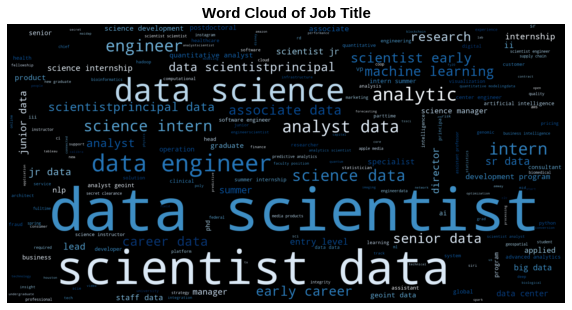

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000, colormap="Blues").generate(" ".join(df.job_title))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('Word Cloud of Job Title', fontsize=15, color ="black", fontweight="bold")
plt.axis('off')
plt.show()

 - The above figure shows the title of the data science jobs. The size of the text represents the frequency obtained in the title. The largetst text "data scientist" demonstrates that highest no 
of jobs has this title. 

 - Question 3. What is the top 10 most popular job title in data science field?

 


Text(0.5, 1.0, 'Top 10 most popular job title')

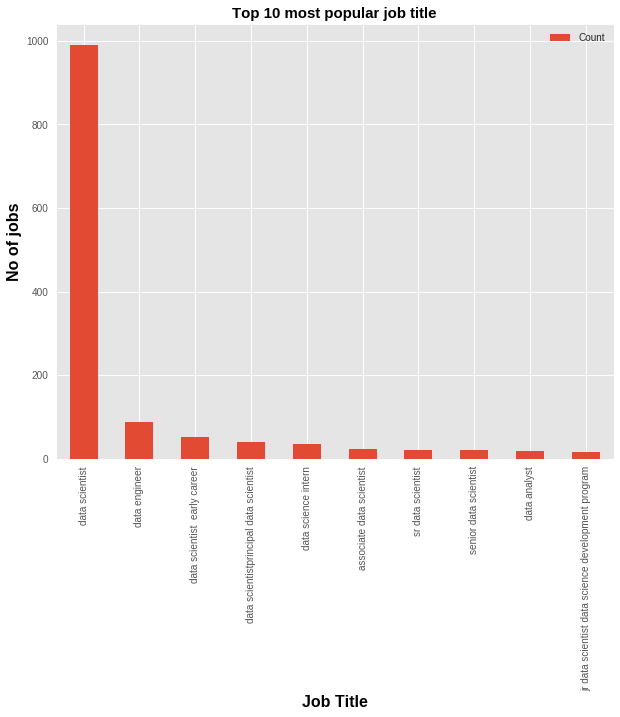

In [ ]:
df_count[:10].plot(x='job_title',y='Count',kind='bar')
plt.ylabel('No of jobs',fontsize=16,color='black', fontweight="bold")
plt.xlabel('Job Title',fontsize=16,color='black', fontweight="bold")
plt.title('Top 10 most popular job title', fontsize=15, color ="black", fontweight="bold")


- The above bar chart shows the frequency of different job titles posted on different job websites,
simplyhired, indeed, and glassdoor. Job title named as Data Scientist is the most common jobs on
every webstie. It has appeared more than 1000 times in our dataset. The no of other job titles are 
insignificant compared to Data Scientist job title.

-  Query 1. Lets see what is the salaray range for Data Scientist?

In [ ]:
df.where(df["job_title"] == "data scientist").estimated_salary.mean()

116539.83959516116

## Company Name

- Question 4. Find the top 10 companies which offer data science related job?


In [ ]:
dd = df.groupby('company_name')['job_title'].count().sort_values(ascending = False).head(10)
pd.DataFrame({'count':dd})

,count
company_name,
Lawrence Livermore National Laboratory,52
Facebook,52
Epsilon,48
Apple,43
Northrop Grumman,42
ELT Solutions,33
charterUP,32
OMP,31
Alt Shift USA,25


- The above table shows the no of job opening at various companies in the data sciece field. Lets see the comparison in barchart below. 

Text(0.5, 1.0, 'Top 10 companies in data science jobs')

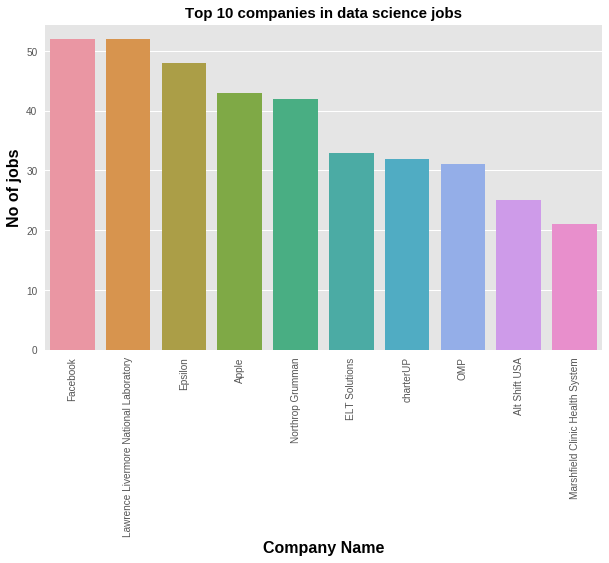

In [ ]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=df.groupby('company_name').count().nlargest(10, 'job_title').reset_index(), x ='company_name', y='job_title')
a.set_xticklabels(df.groupby('company_name').count().nlargest(10, 'job_title').reset_index()['company_name'],rotation=90)   
a.set_ylabel('No of jobs',fontsize=16,color='black', fontweight="bold")
a.set_xlabel('Company Name',fontsize=16,color='black', fontweight="bold")
plt.title('Jobs Based on State', fontsize=15, color ="black", fontweight="bold")
plt.title('Top 10 companies in data science jobs', fontsize=15, color ="black", fontweight="bold")


- It is obvious that the company which deals with public information offers the most jobs in data science 
The Lawrence Livermore National Laboratory ranks second in terms of data science related job offer.
Since this national lab is funded by federal government, it collects and monitor people activity
online. Apple which is in software and hardware business collects big data through their own devices
and software. It makes sense they also need lot of data scientists, analyst and others to process the data.
We are suprised to see that health system joined the race in leveraging patients data. 


-  Question 5. Find the mean salary in different companies 

company_name
Blue Owl                     275000.0
DonorBureau LLC              260000.0
CLS Bank International       208000.0
ficus Inc                    205000.0
Chiro Matchmakers            200000.0
                               ...   
National League of Cities     29120.0
The Bee Corp                  29120.0
CATCH Intelligence            29120.0
Accelalpha                    23400.0
Yang2020                      12000.0
Name: estimated_salary, Length: 1483, dtype: float64


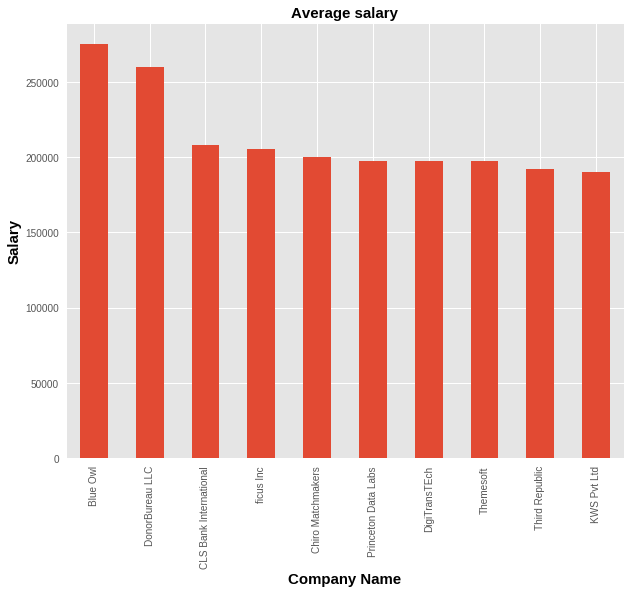

In [ ]:
df['estimated_salary'].value_counts()
df["estimated_salary"].astype(int)
ds=df.groupby('company_name')['estimated_salary'].sum().sort_values(ascending = False)
dc=df.groupby('company_name')['estimated_salary'].count().sort_values(ascending = False)
da=ds/dc
daa=da.sort_values(ascending =False)
daa[:10].plot.bar()
plt.xlabel('Company Name', fontsize=15, color ="black",fontweight="bold")
plt.ylabel('Salary', fontsize=15, color ="black",fontweight="bold")
plt.title('Average salary', fontsize=15, color ="black", fontweight="bold")
print(daa)

- Surprisingly, big listed companies didn't make it on this list. . This is why we are interested in finding Facebook average salary. 

In [ ]:
#Query
df.where((df["company_name"] == "Facebook")).estimated_salary.mean()


117036.2127387539

- We expected the average salary of facebook much higher than what we got. Facebook hires data
scientisit in different states where the salary ranges are very different. It is also possible that
the average salary posted on the job website is not accurate or collected from glassdoor. Not
all the employees report their salaries on glassdoor. 

- The highest average salary was offered by a new start up company in california named as Blue Owl. 
They are leveraging drivers driving habit data to estimate the insurance bill. The second best 
comapny which offers high average salary is Donor Bureau LLC. It uses analytics to improve their 
customers net profit. Based on the above graph chart, the start up company offers higher salary. 

## State and City

- Question. Based on state and city combined, which company has more more jobs? 

Text(0.5, 1.0, 'Top Employer by ')

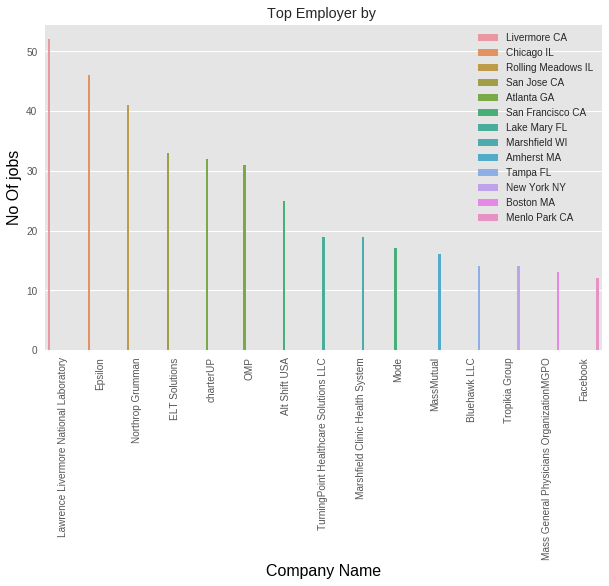

In [ ]:
total_no_cities=df['location'].nunique()
combined=df.groupby(['location','company_name'])['job_title'].count()     
combined=combined.reset_index()
combined=combined.sort_values(['job_title'],ascending=False)
combined=combined.head(15) 

# Plot graph for top most location and no of jobs
fig,a=plt.subplots(figsize=(10,6))             
a=sns.barplot(x="company_name", y="job_title", hue="location", data=combined);    
a.set_xticklabels(combined['company_name'],rotation=90) 
a.legend(loc='upper right')
a.set_ylabel('No Of jobs',fontsize=16,color='black')
a.set_xlabel('Company Name',fontsize=16,color='black') 
a.set_title("Top Employer by ")

Lawrence Livermore National Lab which is situated at Livermore city in California offers the highest no of jobs

 - Mean and median Salary based on location
 - Based on mean and median salary Franklin,TN and Campbell,CA mean and meaiand salaies are same.

Text(0.5, 1.0, 'Average salary locationwise')

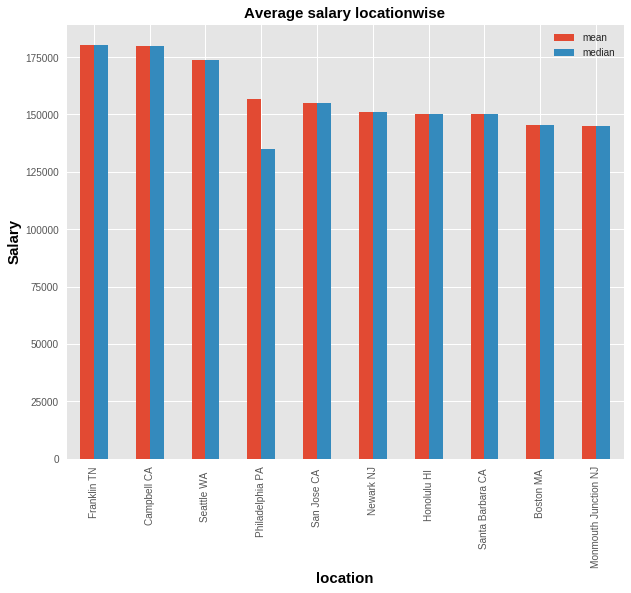

In [ ]:
df.groupby('location').estimated_salary.agg([np.mean,np.median]).sort_values('mean', ascending = False)[:10].plot.bar()
plt.xlabel('location', fontsize=15, color ="black",fontweight="bold")
plt.ylabel('Salary', fontsize=15, color ="black",fontweight="bold")
plt.title('Average salary locationwise', fontsize=15, color ="black", fontweight="bold")

-  Question 6: Which state has more data science jobs?

Text(0.5, 1.0, 'Jobs Based on State')

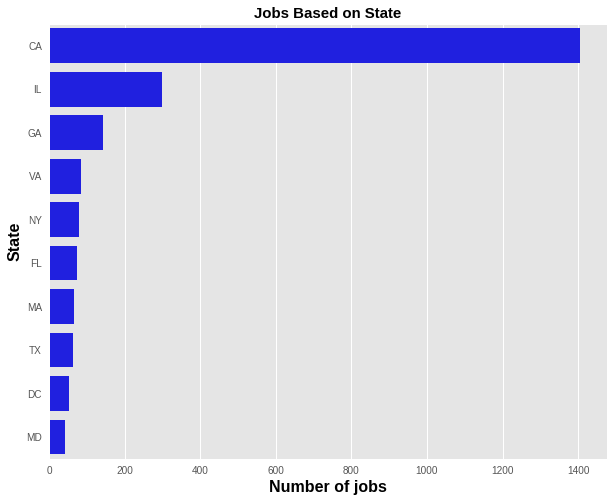

In [ ]:
plt.rcParams['figure.figsize'] = 10,8
g2  = sns.barplot(df.state.value_counts().values[:10], df.state.value_counts().index[1:11], color='blue')
plt.xlabel('Number of jobs',fontsize=16,color='black', fontweight="bold")
plt.ylabel('State',fontsize=16,color='black', fontweight="bold")
plt.title('Jobs Based on State', fontsize=15, color ="black", fontweight="bold")


- The above plot reveals that California offers the maximum no of data science jobs
since all the software companies are mostly in the california. Surprisingly, Illinois
offers the second most data science jobs. It is worth mentioned here that the dataset
was collected lately. It is possible recently the companies in illinois are hiring more
and more data scientists due to their business expansion. Even though michigan has more 
automotive related jobs, fortunately, it offers handsome amount of data science related jobs.

-  Question 7: Which top five cities that hire most?

Text(0.5, 1.0, 'Jobs Based on City')

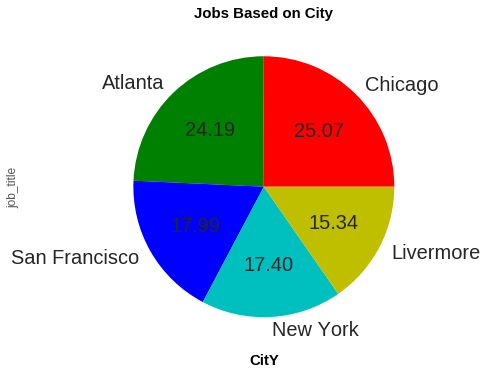

In [ ]:
from matplotlib import cm

dd_df=df.loc[df['city'] != 'Not Mention']

dd = dd_df.groupby('city')['job_title'].count().sort_values(ascending = False).head(5)
pd.DataFrame({'count':dd})
pie = dd.plot.pie( colors=['r','g','b','c','y'], autopct='%.2f',fontsize=20, figsize=(6, 6))
pie.yaxis.set_label_coords(-0.25, 0.5)
plt.xlabel('CitY', fontsize=15, color ="black", fontweight="bold")
plt.title('Jobs Based on City', fontsize=15, color ="black", fontweight="bold")



- From the top 5 cities chart, we can see that Atlanta and Chicago take top spot. Data science jobs are more diversified across different cities unlike software jobs in california. 

-  Question 8. Which cities in California offer the most data science jobs?

Text(0.5, 1.0, 'California: positons across cities')

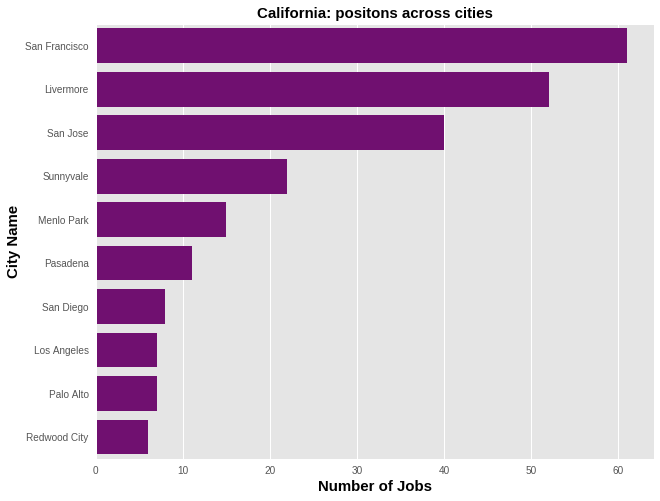

In [ ]:
g  = sns.barplot(df[df.state=='CA'].city.value_counts().values[:10], 
                 df[df.state=='CA'].city.value_counts().index[:10], color ='purple')
plt.xlabel('Number of Jobs', fontsize=15, color ="black",fontweight="bold")
plt.ylabel('City Name', fontsize=15, color ="black", fontweight="bold")
plt.title('California: positons across cities', fontsize=15, color ="black", fontweight="bold")

**Question 9.Which company in San Francisco hires the most?**

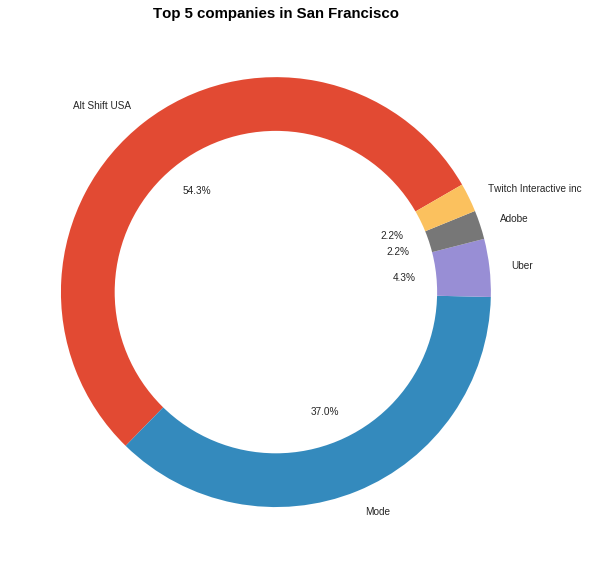

In [ ]:
ca_df=df[df.city=='San Francisco']
ca_df.head()
ac = ['Alt Shift USA','Mode','Uber','Adobe','Twitch Interactive inc']
plt.pie(ca_df.company_name.value_counts()[:5], autopct='%1.1f%%', startangle=30, labels = ac)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 5 companies in San Francisco',fontsize=15, color ="black", fontweight="bold")
plt.tight_layout()
plt.show()

- Alt shift  and  Mode account for 90% of job openings. These 2 
 startups  support data analytics services to big companies like lyft, zillow and others.

## Education

-  Question 10. Educational degree requirements

In [ ]:
df['educ']=df['education'].str.split(',')
ddk_df =df.loc[df['educ'] != "0"]
ddk_df.dropna(inplace=True)
print(ddk_df['educ'])
ddk_df['educ']=ddk_df['education'].str.split(',')

3                                 []
4                 [Master, Doctoral]
7                                 []
10                [Master, Doctoral]
11      [Master, Bachelor, Doctoral]
                    ...             
1345                              []
1346                      [Bachelor]
1347                      [Bachelor]
1370                      [Bachelor]
1594                              []
Name: educ, Length: 1260, dtype: object


In [ ]:
from collections import Counter
flattened_edu= [item for sublist in ddk_df.educ for item in sublist]
without_spaces=[s.strip() for s in flattened_edu]
edu_list=[s.lower() for s in without_spaces]
edu_dict=dict(Counter(edu_list))
sorted_edu=sorted(edu_dict.items(), key=lambda x:-x[1])
sorted_edu_dict=dict(sorted_edu[:30])

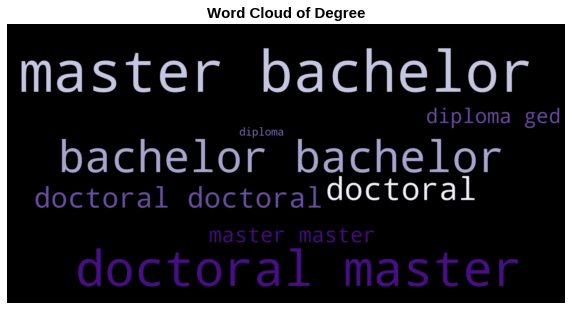

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000, colormap="Purples").generate(" ".join(edu_list))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('Word Cloud of Degree', fontsize=15, color ="black", fontweight="bold")
plt.axis('off')
plt.show()

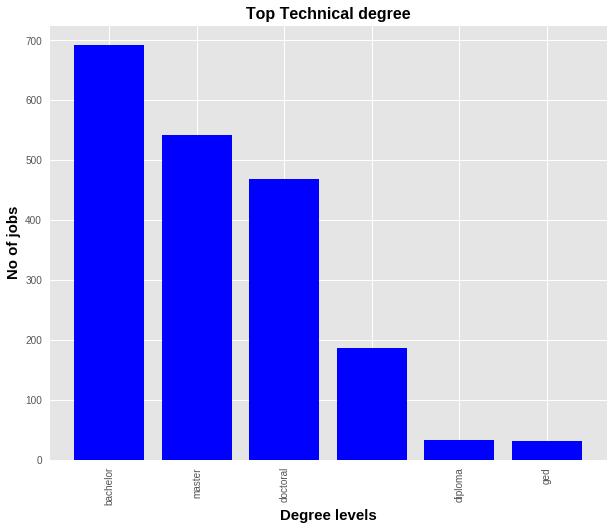

In [ ]:
x=list(range(len(sorted_edu_dict)))
plt.xticks(x, sorted_edu_dict.keys() ,rotation=90)
plt.bar(x ,sorted_edu_dict.values(), color='Blue')
plt.title('Top Technical degree',fontsize=16,color='black', fontweight="bold")
plt.ylabel('No of jobs', fontsize=15, color ="black", fontweight="bold")
plt.xlabel('Degree levels', fontsize=15, color ="black", fontweight="bold")
plt.show()

Interestingly, there are few jobs which require only diploma GED to get a data science job. Most of
the jobs are offered to bachelor degree holders. The total no of jobs that require at least master 
degree rank in second. The third most data scientists jobs require PhD degree and no of job opening 
for PhD and Master's students is not huge. This reveals that data scientist position requires advanced degree. A candidate with PhD may get higher chance of getting hired in comparision to Master degree. 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package squarify
E: Unable to locate package python3-squarify


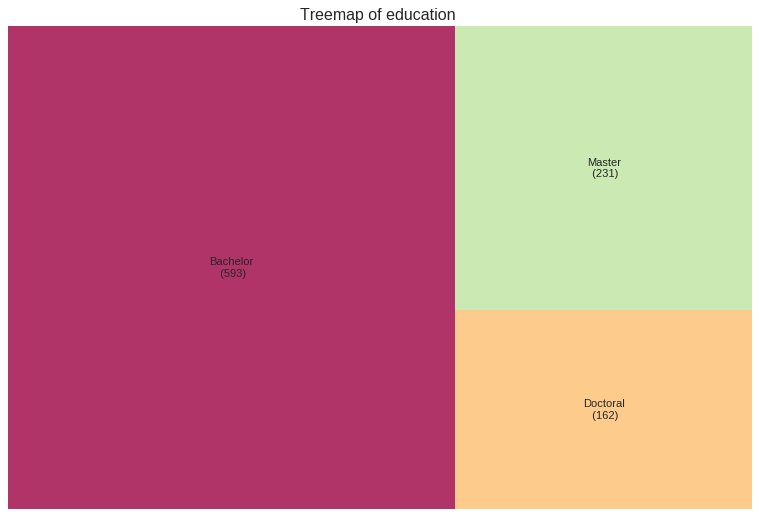

In [ ]:
# Prepare Data

!apt-get install squarify python3-squarify
! pip install squarify
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

e_df=df.loc[df['education'].isin(['Bachelor','Master','Doctoral'])]

e_df =e_df.groupby('education').size().reset_index(name='counts')
labels = e_df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = e_df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of education ')
plt.axis('off')
plt.show()

In [ ]:
e_df.head()

,education,counts
0,Bachelor,593
1,Doctoral,162
2,Master,231


** Most jobs require a Bachelors degree, followed by a Master and Doctoral **

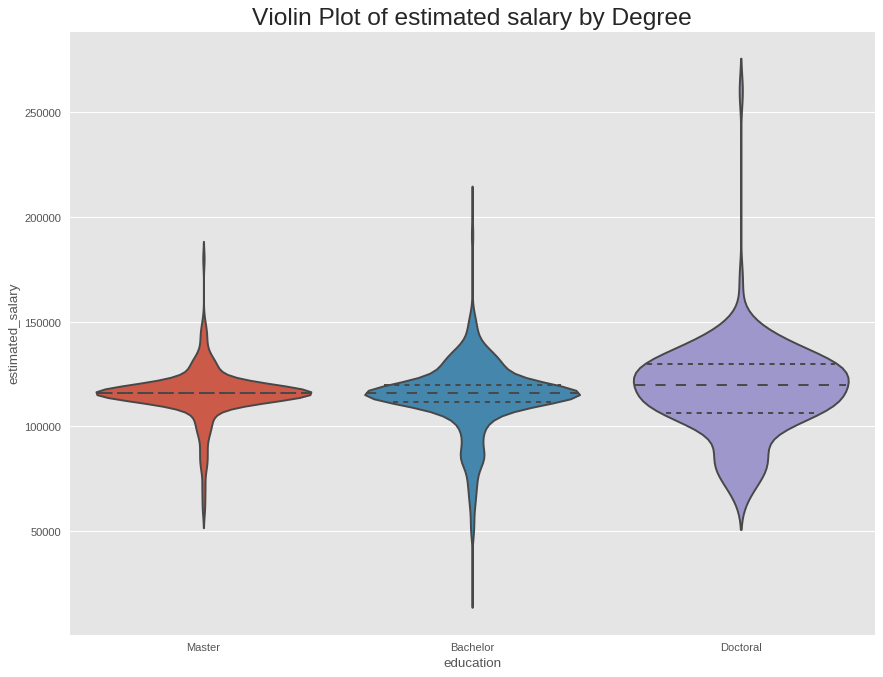

In [ ]:
#e_df=df.loc[df['education'].isin(['Bachelor','Master','Doctoral'])]

sal_df=df[(df.education=='Bachelor') | (df.education=='Master') |(df.education =='Doctoral')]
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='education', y='estimated_salary', data=sal_df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of estimated salary by Degree', fontsize=22)
plt.show()

**The average salaries are in the same range , with a Doctoral degree can expect to be in the average range**

**The top companies that hire Doctoral degree holder**

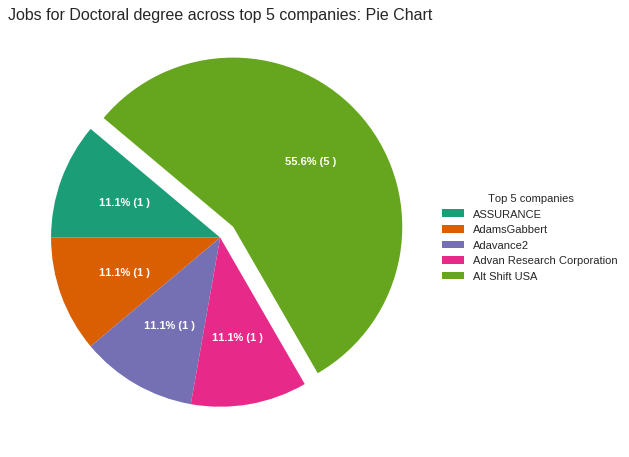

In [ ]:
# Prepare Data
c_df=df[df.education =='Doctoral']

c_df = c_df.groupby('company_name').size().reset_index(name='counts')[:5]

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = c_df['counts']
categories = c_df['company_name']
explode = [0,0,0,0,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title=" Top 5 companies", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Jobs for Doctoral degree across top 5 companies: Pie Chart")

plt.show()

 **Alt Shift USA has the most jobs for Doctoral **

- Interestingly, there are few jobs which require only diploma GED to get a data science job. Most of
the jobs are offered to bachelor degree holders. The total no of jobs that require at least master 
degree rank in second. The third most data scientists jobs require PhD degree and no of job opening 
for PhD and Master's students is not huge. This reveals that data scientist position requires advanced degree. A candidate with PhD may get higher chance of getting hired in comparision to Master degree. 

## Programming Skill

In [ ]:
df['SKILLS_SPLIT']=df['skills'].str.split(',')
dds_df =df.loc[df['SKILLS_SPLIT'] != "Nothing_found"]
dds_df.dropna(inplace=True)
print(dds_df['SKILLS_SPLIT'])
dds_df['SKILLS_SPLIT']=dds_df['skills'].str.split(',')

3                   [statistic, r, machine learning]
4                   [statistic, r, machine learning]
7                   [statistic, r, machine learning]
10      [statistic, r, machine learning, tensorflow]
11                  [statistic, r, machine learning]
                            ...                     
1345                                             [r]
1346                                             [r]
1347                                  [statistic, r]
1370                                             [r]
1594                [statistic, r, machine learning]
Name: SKILLS_SPLIT, Length: 1260, dtype: object


In [ ]:
from collections import Counter
flattened_skills= [item for sublist in dds_df.SKILLS_SPLIT for item in sublist]
without_spaces=[s.strip() for s in flattened_skills]
skills_list=[s.lower() for s in without_spaces]
skills_dict=dict(Counter(skills_list))
sorted_skills=sorted(skills_dict.items(), key=lambda x:-x[1])
sorted_skills_dict=dict(sorted_skills[:30])

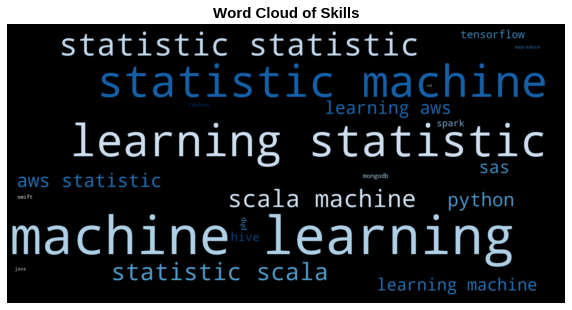

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000, colormap="Blues").generate(" ".join(skills_list))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('Word Cloud of Skills', fontsize=15, color ="black", fontweight="bold")
plt.axis('off')
plt.show()

- Statistic  is the top most skill.

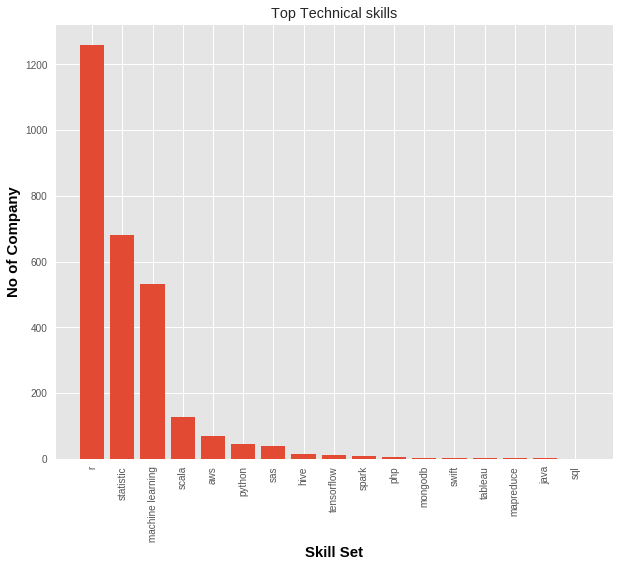

In [ ]:
x=list(range(len(sorted_skills_dict)))
plt.xticks(x, sorted_skills_dict.keys() ,rotation=90)
plt.bar(x ,sorted_skills_dict.values())
plt.title('Top Technical skills')
plt.ylabel('No of Company', fontsize=15, color ="black", fontweight="bold")
plt.xlabel('Skill Set', fontsize=15, color ="black", fontweight="bold")
plt.show()

**R programing language is the most popular skill. Machine learning follows behind and the rest of the skill set are similar in demand **

In [ ]:
# In demand skill set by job title(Top 3)

In [ ]:
df.columns
s_df=df[['Python','R','NoSQL','Hive','Scala','Spark','SQL','AWS','SAS']]
s_df.head()

,Python,R,NoSQL,Hive,Scala,Spark,SQL,AWS,SAS
0,1,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,1,0,1,0,1,1,1,0
4,1,1,0,1,1,1,1,1,1


** correlation between top 10 technical  skill set**

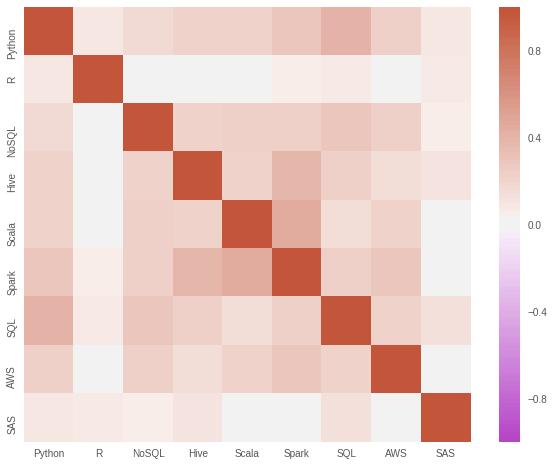

In [ ]:
numeric=['Python','R','NoSQL','Hive','Scala','Spark','SQL','AWS','SAS']
s_df[numeric] = s_df[numeric].apply(pd.to_numeric, errors='coerce')
corr = pd.DataFrame(s_df).corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(300, 20, n=100))


 ** We can see some skill combination that are correlated, like python ans SQL. Hive,scala and Spark, R with python**

## Managerial Skills

In [ ]:
df['SKILLS_SPLIT']=df['management_skills'].str.split(',')
ddm_df =df.loc[df['SKILLS_SPLIT'] != "Nothing_found"]
ddm_df.dropna(inplace=True)
print(ddm_df['SKILLS_SPLIT'])
ddm_df['SKILLS_SPLIT']=ddm_df['management_skills'].str.split(',')

3       [predictive analytics, communication skill]
4                                                []
7                             [communication skill]
10                           [predictive analytics]
11                                [risk management]
                           ...                     
1345                                             []
1346                                             []
1347                                             []
1370                                             []
1594                                             []
Name: SKILLS_SPLIT, Length: 1260, dtype: object


In [ ]:
from collections import Counter
flattened_skills= [item for sublist in ddm_df.SKILLS_SPLIT for item in sublist]
without_spaces=[s.strip() for s in flattened_skills]
skills_list=[s.lower() for s in without_spaces]
skills_dict=dict(Counter(skills_list))
sorted_skills=sorted(skills_dict.items(), key=lambda x:-x[1])
sorted_skills_dict=dict(sorted_skills[:30])

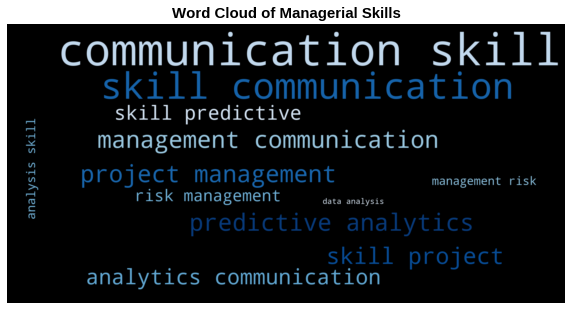

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000, colormap="Blues").generate(" ".join(skills_list))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('Word Cloud of Managerial Skills', fontsize=15, color ="black", fontweight="bold")
plt.axis('off')
plt.show()

 -  Communication skill is dominating based on word cloud.

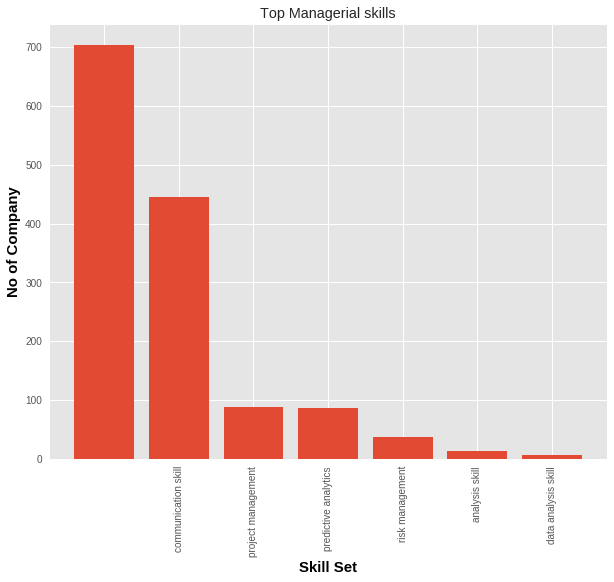

In [ ]:
x=list(range(len(sorted_skills_dict)))
plt.xticks(x, sorted_skills_dict.keys() ,rotation=90)
plt.bar(x ,sorted_skills_dict.values())
plt.title('Top Managerial skills')
plt.ylabel('No of Company', fontsize=15, color ="black", fontweight="bold")
plt.xlabel('Skill Set', fontsize=15, color ="black", fontweight="bold")
plt.show()

- Based on this graph statistic and communication skills are most common requirement for companies

In [ ]:
df.columns
m_df=df[['Communication_Skill','Project_Management','Risk_Management','Predictive_Analytics','Data_Analysis_Skill']]
m_df.head()


,Communication_Skill,Project_Management,Risk_Management,Predictive_Analytics,Data_Analysis_Skill
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0



** correlation between top 10 managerial  skill set**






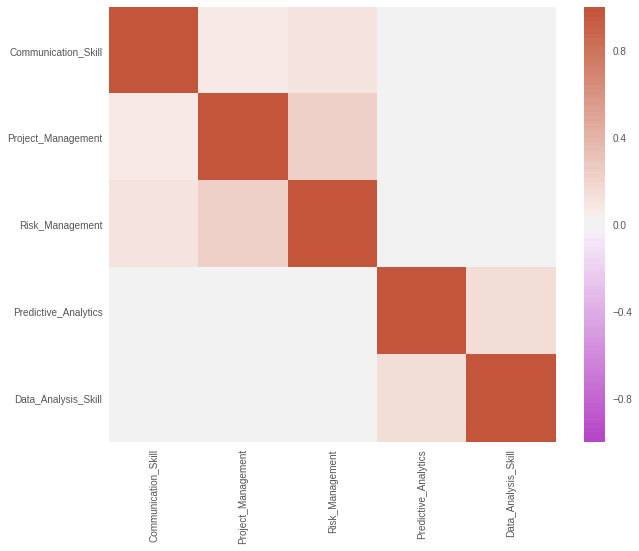

In [ ]:
numeric=['Communication_Skill','Project_Management','Risk_Management','Predictive_Analytics','Data_Analysis_Skill']
m_df[numeric] = m_df[numeric].apply(pd.to_numeric, errors='coerce')
corr = pd.DataFrame(m_df).corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(300, 20, n=100))


 ** We can see risk management has relation with project management**

## Salary

Question 10. Salary distribution of data science job in the USA.

In [ ]:
state_map.head()
#state_map['Abbreviation'].head()
#print(state_map['Abbreviation'].index)
#df['state'].head()
df["Latitude"]= np.nan
df['Longitude'] = np.nan

In [ ]:
for ind in state_map['Abbreviation'].index:
    for ind2 in df['state'].index:
        if df['state'][ind2]==state_map['Abbreviation'][ind]:
           df['Latitude'][ind2]=state_map['Latitude'][ind]
           df['Longitude'][ind2]=state_map['Longitude'][ind]

In [ ]:
sm=df[np.isfinite(df['Longitude'])]
sm.head()

,job_title,company_name,location,job_description,estimated_salary,city,state,Latitude,Longitude,skills,management_skills,education,Python,SQL,NoSQL,java,swift,PHP,R,Project_Management,Risk_Management,Analysis_Skill,Hadoop,SAS,Microsoft_Word,Microsoft_Office,Hive,AWS,Spark,Data_Mining,Predictive_Analytics,Machine_Learning,Pig,Data_Analysis_Skill,Communication_Skill,Matlab,Scala,bachelor_degree,master_degree,diploma_ged,doctoral_degree,educ,SKILLS_SPLIT,above_med_salary,above_mean_salary
3,data scientist entry level,Numerdox,Sacramento CA,SkillsSQL401kHadoopAWSSparkBenefitsFlexible Sp...,135000.0,Sacramento,CA,36.116203,-119.681564,"statistic,r,machine learning","predictive analytics,communication skill",,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,[],"[predictive analytics, communication skill]",1.0,1.0
4,data scientist,Quaxigma,Schaumburg IL,EducationMaster's DegreeDoctoral DegreeSkillsS...,113000.0,Schaumburg,IL,40.349457,-88.986137,"statistic,r,machine learning",,"Master,Doctoral",1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,"[Master, Doctoral]",[],0.0,0.0
7,data scientist 10774 no c2c,Production Modeling Corporation,Auburn Hills MI,SkillsScriptingAnalysis SkillsSASCommunication...,115000.0,Auburn Hills,MI,43.326618,-84.536095,"statistic,r,machine learning",communication skill,,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,[],[communication skill],0.0,0.0
10,junior data scientist,DataSprouts,Bloomington IN,EducationMaster's DegreeDoctoral DegreeSkillsS...,106500.0,Bloomington,IN,39.849426,-86.258278,"statistic,r,machine learning,tensorflow",predictive analytics,"Master,Doctoral",1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,"[Master, Doctoral]",[predictive analytics],0.0,0.0
11,data scientist,aThingz,Southfield MI,EducationBachelor's DegreeMaster's DegreeDocto...,125000.0,Southfield,MI,43.326618,-84.536095,"statistic,r,machine learning",risk management,"Master,Bachelor,Doctoral",1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,"[Master, Bachelor, Doctoral]",[risk management],1.0,1.0


In [ ]:
import plotly.graph_objects as go

import pandas as pd


sm['text']=sm['company_name']+ ', ' + sm['state']

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = sm['Longitude'],
        lat = sm['Latitude'],
        text =sm['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(255, 255, 255)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = df['estimated_salary'],
            cmax = df['estimated_salary'].max(),
            colorbar_title="Salary ($)"
        )))

fig.update_layout(
        title = 'Salary distribution of data science employees',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

**The USA maps shows the salary distribution of data science employees across the united states. The color map shows the salary range at
different states. If you hover on the dots, you would see the company name and the state. This graph can further be improved to change the color
at different scales. **

In [ ]:
# Let's look at how salary is distributed 

In [ ]:
#what is the median salary? (calculate mean salary, too, for fun)
print('estimated_salary median: ' + str(df['estimated_salary'].median()))
print('estimated_salary mean: ' + str(df['estimated_salary'].mean()))
#creating new target variable "above_med_sal" where 0 == below or equal to the median, and 1 == above the median; any postings without salary information will have NaN values for this variable
df['above_med_salary'] = np.nan
df.loc[df['estimated_salary'] > df['estimated_salary'].median(), 'above_med_salary'] = 1
df.loc[df['estimated_salary'] <= df['estimated_salary'].median(), 'above_med_salary'] = 0
df['above_mean_salary'] = np.nan
df.loc[df['estimated_salary'] > df['estimated_salary'].mean(), 'above_mean_salary'] = 1
df.loc[df['estimated_salary'] <= df['estimated_salary'].mean(), 'above_mean_salary'] = 0


estimated_salary median: 115910.9446404342
estimated_salary mean: 115954.2758346932


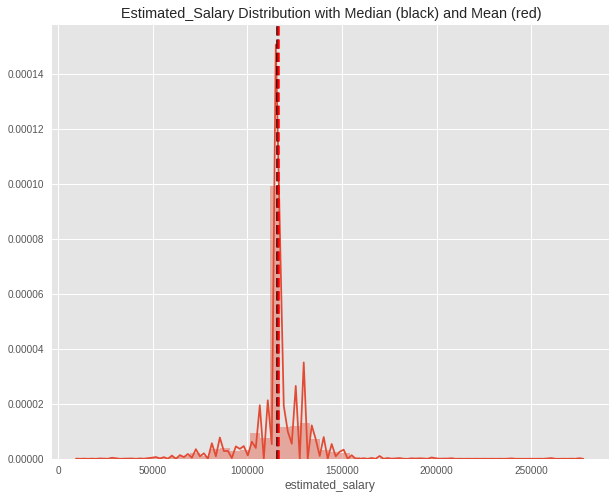

In [ ]:
#plotting salary distribution, with vertical lines to represent the mean and median salary
sal_plot = df[df['estimated_salary'].notnull()]
ax = sns.distplot(sal_plot['estimated_salary'])
ax.axvline(sal_plot['estimated_salary'].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(sal_plot['estimated_salary'].mean(), lw=2.5, ls='dashed', color='red')
plt.title(' Estimated_Salary Distribution with Median (black) and Mean (red)')
plt.show()

**Plot shows almost a normal distribution of estimated salary**

**Box and whisker plot**

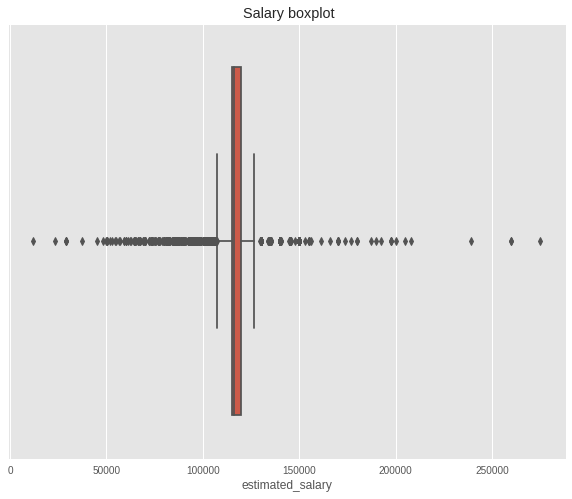

count      2675.000000
mean     115954.275835
std       16923.782226
min       12000.000000
25%      115000.000000
50%      115910.944640
75%      120000.000000
max      275000.000000
Name: estimated_salary, dtype: float64


In [ ]:
n_data = len(df.estimated_salary)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.title(' Salary boxplot')
plt.xlabel('Salary (thousands of dollars)')
sns.boxplot(df.estimated_salary)
plt.show()

print(pd.to_numeric(df.estimated_salary).describe())

** Salary distribution show the outliers, there are outliesrs above 200000 and belwo 50000**

# Summary:

Our analysis shows:
1. The most common sought programming language is R, Python, and Machine learning. On the other hand, SAS, and AWS are the least required skills in the job.  
2. The most popular job title is "Data Scientist"
3. Facebook and Lawrence Livermore National Lab offer highest no of data science jobs
4. Start up companies offer much higher salary compared to the big name company
5. California has the highest no of data science job whereas illinois is the second highest in this case
6. Chicago offer the highest no of data science jobs in the USA whereas its nearest competitor is Atlanta. On the other hand, San Francisco
secured its position to third. 
7. Among all available jobs, the two new start ups named as Alt Shift and Mode offered 54% and 37% jobs, respectively.
8. Minimum educational experience for data science jobs is bachelor. However, candidates with Masters and PhD are highly sought.